# Naive Bayes using Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mat
import seaborn as sns

In [2]:
# set current working directory

os.chdir('C:/Users/user/Desktop/Classification/Ann/Logistic/Logistic_reg/')

### Load dataset

In [3]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = data.drop(['Name','Ticket'],1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


### Data Imputation

In [5]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
                return 37
        elif Pclass == 2:
                return 29
        else:
                return 24

    return Age

In [6]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [7]:
#no null values in age
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.drop('Cabin',axis = 1,inplace = True)

In [9]:
#no null values in cabins
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [10]:
data.dropna(inplace=True) # remove na

In [11]:
#no null values in cabins
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Data Wrangling - Label encoding

In [12]:
# import the library
from sklearn import preprocessing

In [13]:
data = data.apply(preprocessing.LabelEncoder().fit_transform)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,2,1,28,1,0,18,2
1,1,1,0,0,51,1,0,207,0
2,2,1,2,0,34,0,0,41,2
3,3,1,0,0,47,1,0,189,2
4,4,0,2,1,47,0,0,43,2


### Data Split

In [14]:
y = data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [15]:
X = data.drop('Survived',1)
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,2,2,0,34,0,0,41,2
3,3,0,0,47,1,0,189,2
4,4,2,1,47,0,0,43,2


In [16]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# split ur data into train and test with 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

### Build Naive Bayes classification Model

In [17]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [18]:
#Create a Gaussian Classifier
model = GaussianNB()

In [19]:
# Train the model using the training sets
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
#Predict Output
predicted= model.predict(X_test)
print ("Predicted Value:", predicted)

Predicted Value: [1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1
 0 1 0 1 0 1 0 0]


### Model Evaluation

In [21]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [22]:
results = confusion_matrix(y_test, predicted)
results

array([[125,  41],
       [ 18,  83]], dtype=int64)

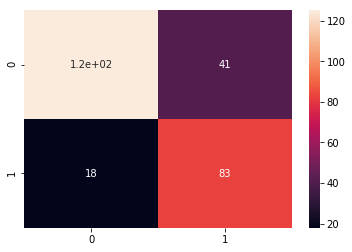

In [23]:
import seaborn as sn
sn.heatmap(results, annot=True)

In [24]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7790262172284644


In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print("Recall:",metrics.recall_score(y_test, predicted))

Accuracy: 0.7790262172284644
Precision: 0.6693548387096774
Recall: 0.8217821782178217
